## Predicting Customer Churn for SyriaTel

## Business Understanding

The goal of this project is to develop a predictive model to identify customers who are likely to stop doing business with SyriaTel, a telecommunications company. By accurately predicting customer churn, SyriaTel can take proactive measures to retain these customers, thereby reducing revenue loss and increasing customer lifetime value. The main stakeholders for this project are the management and marketing teams of SyriaTel, who are directly involved in customer retention strategies.

Customer churn is a critical issue in the telecom industry, where acquiring a new customer is often more expensive than retaining an existing one. By predicting which customers are likely to churn, SyriaTel can implement targeted retention campaigns, offer personalized incentives, and improve customer satisfaction, ultimately reducing churn rates and improving profitability.

## Problem Statement

SyriaTel has been experiencing a high churn rate leading to losses for the company.This project aims to create a predictive model that accurately identifies customers at risk of churning for SyriaTel, a telecommunications company.

By proactively identifying customers who may discontinue their services, the objective is to decrease customer attrition and retain a higher number of customers. Ultimately, the project seeks to support SyriaTel in reducing financial losses caused by customer churn, improving overall customer retention rates, and optimizing business strategies to enhance profitability.

## Objectives

The primary business objectives of this project for SyriaTel are to reduce customer churn, improve customer retention rates, and enhance overall customer satisfaction.

We will focus on the following questions to achieve our objectives;



## Data Understanding

Data Reference: https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/data

The dataset contains information on 3,333 customers from SyriaTel, with 21 features including demographic data, service usage, and customer interaction metrics. The target variable is churn, indicating whether a customer has left the company.

### Summary Features in the Dataset

- state: the state the customer lives in

- account length: the number of days the customer has had an account

- area code: the area code of the customer

- phone number: the phone number of the customer

- international plan: true if the customer has the international plan, otherwise false

- voice mail plan: true if the customer has the voice mail plan, otherwise false

- number vmail messages: the number of voicemails the customer has sent

- total night calls: total number of calls the customer has done during the night

- total night calls: total number of calls the customer has done during the night

- total night charge: total amount of money the customer was charged by the Telecom company for calls during the night

- total intl minutes: total number of minutes the user has been in international calls

- total intl calls: total number of international calls the customer has done

- total intl charge: total amount of money the customer was charged by the Telecom company for international calls

- customer service calls: number of calls the customer has made to customer service

- churn: true if the customer terminated their contract, otherwise false

In [13]:
# Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Loading Data

In [4]:
# Imorting the dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('customer_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# Checking for the shape of the dataset
df.shape

(3333, 21)

In [6]:
# Detailed information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
# Summary statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Data Cleaning

In [8]:
# Checking for missing data

df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There is no missing data.

In [9]:
# checking for duplicates in the 'phone number' column

duplicates = df['phone number'].duplicated().sum()
duplicates

0

There no duplicates in the phone number column which should contain unique values.

## Exploratory Data Analysis

In [15]:
# Convert the "churn" column to integer type
df["churn"] = df["churn"].astype(int)

In [12]:
# seperating categorical from numerical data

categorical_df = df.select_dtypes("object")
categorical_df = categorical_df.drop("phone number", axis=1)
categorical_df.head()

,state,international plan,voice mail plan
0,KS,no,yes
1,OH,no,yes
2,NJ,no,no
3,OH,yes,no
4,OK,yes,no


The "phone number" column was dropped because it is useful as a unique identifier but not as a feature.

In [16]:
# numerical data
numeric_df =  df.select_dtypes("number")
numeric_df.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Univariate Analysis

0    2850
1     483
Name: churn, dtype: int64


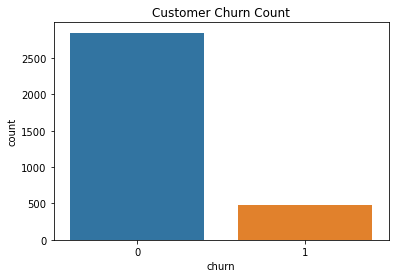

In [27]:
# Count of churn (target variable)

print(df['churn'].value_counts())

# Visualize the churn distribution using a count plot
sns.countplot(data=df, x='churn')
plt.title('Customer Churn Count')
plt.show()

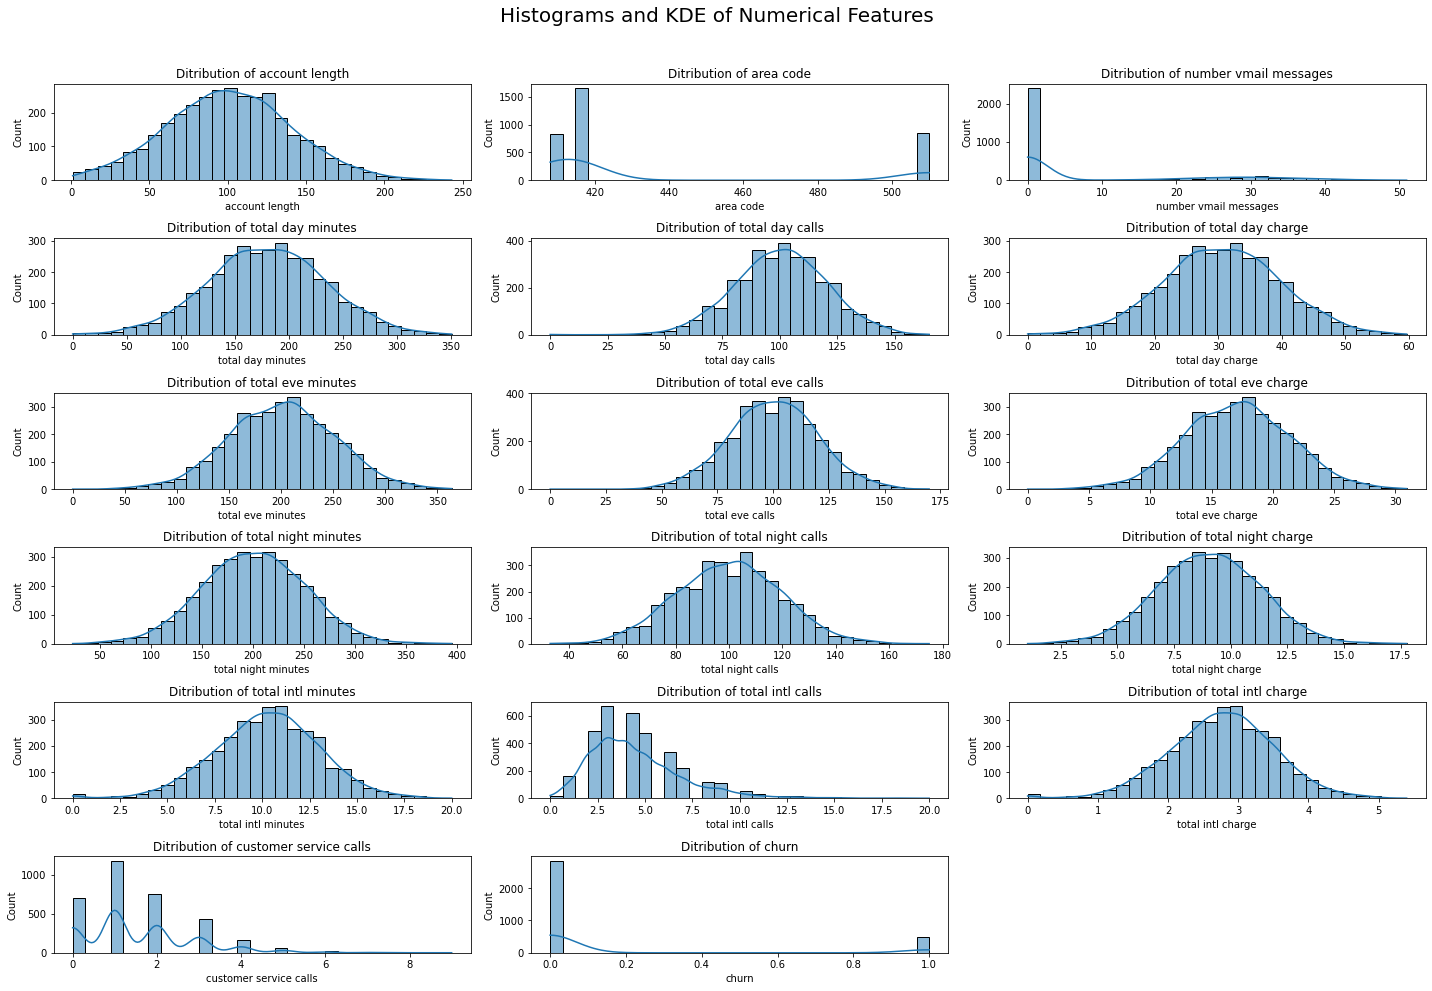

In [38]:
# Visualizing the distributions of numerical features using histograms with KDE
plt.figure(figsize=(20, 14))

for i, column in enumerate(numeric_df.columns):
    plt.subplot(len(numeric_df.columns) // 3 + 1, 3, i + 1)
    sns.histplot(numeric_df[column], kde=True, bins=30)
    plt.title(f'Ditribution of {column}')

plt.suptitle('Histograms and KDE of Numerical Features', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()